Task 1 : Predict Restaurent Ratings :-

Objective: Build a machine learning model to predict the
aggregate rating of a restaurant based on other features.

Steps:

Preprocess the dataset by handling missing values,
encoding categorical variables, and splitting the data
into training and testing sets.
Select a regression algorithm (e.g., linear regression,
decision tree regression) and train it on the training data.
Evaluate the model's performance using appropriate
regression metrics (e.g., mean squared error, R-squared)
on the testing data.
Interpret the model's results and analyze the most
influential features affecting restaurant ratings.


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
import os
print(os.getcwd())

d:\Python\AI & ML\Cognify


In [8]:
#Load Datset and Read the File

df = pd.read_csv('Dataset .csv')
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [9]:
#Data Preprocessing

#Drop Irrelevent Columns (Columns like Restaurant ID, Name, Address are not useful for prediction.)

df.drop(['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 'Rating color', 'Rating text'], axis=1, inplace=True)


In [11]:
df.head()

Country Code              City   Longitude   Latitude  \
0           162       Makati City  121.027535  14.565443   
1           162       Makati City  121.014101  14.553708   
2           162  Mandaluyong City  121.056831  14.581404   
3           162  Mandaluyong City  121.056475  14.585318   
4           162  Mandaluyong City  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating  Votes  
0                   No            3               4.8    314  
1                   No            3               4.5    591  
2                   No            4               4.4    270  
3                   No            4               4.9    365  
4                   No            4               4.8    229

In [12]:
#Handle Missing Values

# Check the missing Value
print(df.isnull().sum())

Country Code            0
City                    0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Votes                   0
dtype: int64


In [13]:
# Fill missing cuisines with mode
df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)

C:\Users\manit\AppData\Local\Temp\ipykernel_17284\1445200832.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cuisines'].fillna(df['Cuisines'].mode()[0], inplace=True)


In [ ]:
#--     Encode Categorical Features

'''We use Label Encoding for binary/text categorical features.'''

#-- List of categorical columns to encode
cat_cols = ['City', 'Cuisines', 'Currency', 'Has Table booking', 
            'Has Online delivery', 'Is delivering now', 'Switch to order menu']

#-- Create a LabelEncoder object
le = LabelEncoder()         #- it helps you convert categories into integers.

#-- Apply label encoding to each column in cat_cols

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

''' 
- This loop goes through each column in cat_cols.
- fit_transform(df[col]) learns the unique values and then maps them to integers.
- The original column is overwritten with the encoded values.

'''

In [23]:
df.head()

Country Code  City   Longitude   Latitude  Cuisines  Average Cost for two  \
0           162    73  121.027535  14.565443       920                  1100   
1           162    73  121.014101  14.553708      1111                  1200   
2           162    75  121.056831  14.581404      1671                  4000   
3           162    75  121.056475  14.585318      1126                  1500   
4           162    75  121.057508  14.584450      1122                  1500   

   Currency  Has Table booking  Has Online delivery  Is delivering now  \
0         0                  1                    0                  0   
1         0                  1                    0                  0   
2         0                  1                    0                  0   
3         0                  0                    0                  0   
4         0                  1                    0                  0   

   Switch to order menu  Price range  Aggregate rating  Votes  
0                     0            3               4.8    314  
1                     0            3               4.5    591  
2                     0            4               4.4    270  
3                     0            4               4.9    365  
4                     0            4               4.8    229

In [15]:
#Splits into Features and Target

# Features (X) and target (y)
X = df.drop('Aggregate rating', axis=1)
y = df['Aggregate rating']

In [16]:
# Split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#-  Linear Regression
from sklearn.linear_model import LinearRegression   
''' 
The LinearRegression model tries to find a straight-line relationship between the input features (X_train) and the target variable (y_train).
'''

#Create a Regression Object
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

''' 
- This line trains the model using your input features (X_train) and their corresponding output labels (y_train).
- The .fit() method calculates the best-fit line using the least squares method, minimizing the error between predicted and actual values.

'''

' \n- This line trains the model using your input features (X_train) and their corresponding output labels (y_train).\n- The .fit() method calculates the best-fit line using the least squares method, minimizing the error between predicted and actual values.\n\n'

In [18]:
#- Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
'''
- It's used for regression problems—like predicting prices, ratings, or any other numeric value.
'''

dt_model = DecisionTreeRegressor(random_state=42)
#it builds a tree where data is split at decision points based on feature values.

dt_model.fit(X_train, y_train)
'''  
- The tree tries to learn patterns and split rules that minimize prediction error.
- Each node in the tree represents a decision based on a feature, and leaf nodes hold the final predicted values.
'''

'  \n- The tree tries to learn patterns and split rules that minimize prediction error.\n- Each node in the tree represents a decision based on a feature, and leaf nodes hold the final predicted values.\n'

In [20]:
#Evaluate the Models:

from sklearn.metrics import mean_squared_error, r2_score

# Predict
y_pred_lr = lr_model.predict(X_test)
y_pred_dt = dt_model.predict(X_test)

''' 
- y_pred_lr contains predicted values from Linear Regression.
- y_pred_dt contains predicted values from Decision Tree.
'''

# Linear Regression Evaluation
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R² Score:", r2_score(y_test, y_pred_lr))

# Decision Tree Evaluation
print("\nDecision Tree Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_dt))
print("R² Score:", r2_score(y_test, y_pred_dt))

'''
- The Mean Squared Error between actual (y_test) and predicted (y_pred) values.
- The R² Score to see how well your model explains the variability in target data.
'''


Linear Regression:
MSE: 1.5860893603897637
R² Score: 0.30315755214599704

Decision Tree Regression:
MSE: 0.1735374149659864
R² Score: 0.9237569836484893


'\n- The Mean Squared Error between actual (y_test) and predicted (y_pred) values.\n- The R² Score to see how well your model explains the variability in target data.\n'

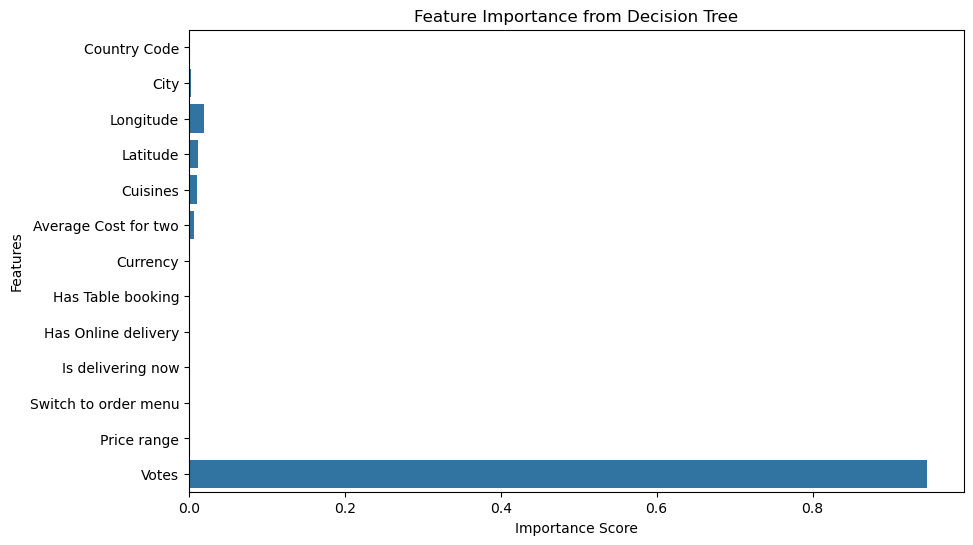

In [ ]:
import matplotlib.pyplot as plt     #-  For general plotting.
import seaborn as sns           #- For advanced visual styling.

# Feature Importance
feature_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance from Decision Tree')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()


In [22]:
''' 
Votes and Average Cost for two appear to be the most influential features.

→ More votes typically indicate popularity and reliability of rating.
→ Cost might be correlated with service quality or target audience.
'''

' \nVotes and Average Cost for two appear to be the most influential features.\n\n→ More votes typically indicate popularity and reliability of rating.\n→ Cost might be correlated with service quality or target audience.\n'

✅ 1. Understanding the Metrics :

🔹 Mean Squared Error (MSE)

Measures the average squared difference between actual and predicted values.

Lower values are better — indicates predictions are closer to actual values.

It has the same unit as the square of the target variable (in this case, ratings²).

🔹 R² Score (Coefficient of Determination)

Tells how much variance in the target variable is explained by the model.

Range: -∞ to 1

1: perfect prediction

0: no better than mean

< 0: worse than a constant model

__________________________________________________________________________________________________________

Model Results:
-------------
🔵 Linear Regression

MSE: 1.58

R²: 0.30 → 🔸 Explains only 30% of the variance

✅ Interpretation: Weak model — underfits the data.
_ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ 

🟢 Decision Tree Regression

MSE: 0.17 → much smaller error!

R²: 0.92 → 🔥 Explains 92% of the variance!

✅ Interpretation: Very good model — fits the data well.